# Testing of SAMueL-1 synthetic data: descriptive statistics

In this notebook we comapre the descriptive statistics for synthetic and real data. Synthetic data is generated from each five k-fold training sets, and here we compare the synthetic to the original data.

We usew thhe 'double' smytnhetic data - two rounds of SMOTE.

## Load packages

In [1]:
# Turn warnings off to keep notebook tidy
import warnings
warnings.filterwarnings("ignore")

import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd

## Load data

In [2]:
data_loc = './../data/sam_1/kfold_5fold/'

train_data, test_data, synthetic_data = [], [], []

for i in range(5):
    train_data.append(pd.read_csv(f'{data_loc}train_{i}.csv'))
    test_data.append(pd.read_csv(f'{data_loc}test_{i}.csv'))
    #synthetic_data.append(pd.read_csv(f'{data_loc}synth_train_{i}.csv'))
    synthetic_data.append(pd.read_csv(f'{data_loc}synthetic_double_{i}.csv'))

In [3]:
descriptive_stats_all_runs = []

for run in range(5):
    
    synth_df = synthetic_data[run].drop('StrokeTeam', axis=1)
    original_data = train_data[run].drop('StrokeTeam', axis=1)
        
  
    descriptive_stats = pd.DataFrame()

    descriptive_stats['Original Thrombolysis mean'] = \
        original_data[original_data['S2Thrombolysis'] == 1].mean()

    descriptive_stats['Synthetic Thrombolysis mean'] = \
        synth_df[synth_df['S2Thrombolysis'] == 1].mean()

    descriptive_stats['Original No thrombolysis mean'] = \
        original_data[original_data['S2Thrombolysis'] == 0].mean()

    descriptive_stats['Synthetic No thrombolysis mean'] = \
        synth_df[synth_df['S2Thrombolysis'] == 0].mean()

    descriptive_stats['Original Thrombolysis std'] = \
        original_data[original_data['S2Thrombolysis'] == 1].std()

    descriptive_stats['Synthetic Thrombolysis std'] = \
        synth_df[synth_df['S2Thrombolysis'] == 1].std()

    descriptive_stats['Original No thrombolysis std'] = \
        original_data[original_data['S2Thrombolysis'] == 0].std()

    descriptive_stats['Synthetic No thrombolysis std'] = \
        synth_df[synth_df['S2Thrombolysis'] == 0].std()
    
    descriptive_stats_all_runs.append(descriptive_stats)

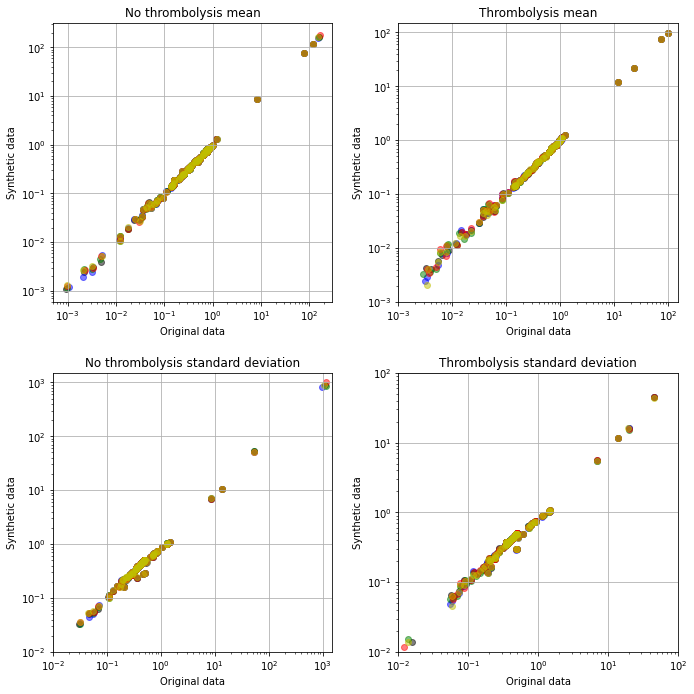

In [4]:
colours = ['k', 'b', 'g', 'r', 'y', 'c', 'm']
fig = plt.figure(figsize=(10,10))
number_of_runs = 5 
# Note: Set x and y limits to avoid plotting values that are very close to zero

# Negative mean
ax1 = fig.add_subplot(221)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[run]['Original No thrombolysis mean'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic No thrombolysis mean'].copy()
    x.drop(labels ='S2Thrombolysis', inplace=True)
    y.drop(labels ='S2Thrombolysis', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax1.scatter(x,y, color=colour, alpha=0.5)
ax1.set_xlabel('Original data')
ax1.set_ylabel('Synthetic data')
#ax1.set_xlim(1e-3, 1e2)
#ax1.set_ylim(1e-3, 1e2)
ax1.set_title('No thrombolysis mean')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid()

# Positive mean
ax2 = fig.add_subplot(222)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[run]['Original Thrombolysis mean'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic Thrombolysis mean'].copy()
    x.drop(labels ='S2Thrombolysis', inplace=True)
    y.drop(labels ='S2Thrombolysis', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax2.scatter(x,y, color=colour, alpha=0.5)
ax2.set_xlabel('Original data')
ax2.set_ylabel('Synthetic data')
ax2.set_title('Thrombolysis mean')
ax2.set_xlim(1e-3, 1.5e2)
ax2.set_ylim(1e-3, 1.5e2)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid()

# Negative standard deviation
ax3 = fig.add_subplot(223)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[run]['Original No thrombolysis std'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic No thrombolysis std'].copy()
    x.drop(labels ='S2Thrombolysis', inplace=True)
    y.drop(labels ='S2Thrombolysis', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax3.scatter(x,y, color=colour, alpha=0.5)
ax3.set_xlabel('Original data')
ax3.set_ylabel('Synthetic data')
ax3.set_title('No thrombolysis standard deviation')
ax3.set_xlim(1e-2, 1.5e3)
ax3.set_ylim(1e-2, 1.5e3)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.grid()

# Positive standard deviation
ax4 = fig.add_subplot(224)
for run in range(number_of_runs):
    x = descriptive_stats_all_runs[run]['Original Thrombolysis std'].copy()
    y = descriptive_stats_all_runs[run]['Synthetic Thrombolysis std'].copy()
    x.drop(labels ='S2Thrombolysis', inplace=True)
    y.drop(labels ='S2Thrombolysis', inplace=True)
    colour = colours[run % 7] # Cycle through 7 colours
    ax4.scatter(x,y, color=colour, alpha=0.5)
ax4.set_xlabel('Original data')
ax4.set_ylabel('Synthetic data')
ax4.set_title('Thrombolysis standard deviation')
ax4.set_xlim(1e-2, 1e2)
ax4.set_ylim(1e-2, 1e2)
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.grid()

plt.tight_layout(pad=2)
plt.savefig('images/smote_correls.png', facecolor='w', dpi=300)
plt.show()

Feature means and standard deviations are well presevered in the synthetic (double SMOTE) data.